In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


dados = pd.read_csv('/content/drive/MyDrive/comics_data.csv')

Visualizando os dados

In [48]:
dados.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
title,'Mazing Man,'Mazing Man,'Mazing Man,'Mazing Man,'Mazing Man
title_link,/series/4036/0/dc-comics-mazing-man,/series/4036/0/dc-comics-mazing-man,/series/4036/0/dc-comics-mazing-man,/series/4036/0/dc-comics-mazing-man,/series/4036/0/dc-comics-mazing-man
issue_link,https://comicbookrealm.com/series/4036/54341/d...,https://comicbookrealm.com/series/4036/54350/d...,https://comicbookrealm.com/series/4036/54351/d...,https://comicbookrealm.com/series/4036/54352/d...,https://comicbookrealm.com/series/4036/54342/d...
cover_link,/cover-scan/acb40c8a57d50781194e37be2a94b3d5/l...,/cover-scan/293f4e231eccb71ad6e6bc3fe3e49c4f/l...,/cover-scan/45c7a284efa7d07f7bb5c9afb3080ffd/l...,/cover-scan/21764f5da802b25622831976f1619aa4/l...,/cover-scan/3a4df503a1fb2450b1227f4c1f0c45d9/l...
issue,# 1,# 10,# 11,# 12,# 2
cover_date,Jan '86,Oct '86,Nov '86,Dec '86,Feb '86
cover_price,$0.75,$0.75,$0.75,$0.75,$0.75
current_value,$3.00,$3.00,$3.00,$4.00,$3.00
hist_prices_link,/comic.php?a=historical&comic=54341?keepThis=t...,/comic.php?a=historical&comic=54350?keepThis=t...,/comic.php?a=historical&comic=54351?keepThis=t...,/comic.php?a=historical&comic=54352?keepThis=t...,/comic.php?a=historical&comic=54342?keepThis=t...


In [49]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,461301.0,230650.000000,133166.272601,0.0,115325.0,230650.0,345975.0,461300.0
searched,461301.0,472.510892,1832.640726,0.0,46.0,119.0,343.0,224080.0
owned,461301.0,54.493832,157.031092,0.0,1.0,6.0,33.0,6478.0
pages,208011.0,53.804641,195.457862,0.0,32.0,32.0,36.0,75960.0
rating,461301.0,0.378575,1.217336,0.0,0.0,0.0,0.0,5.0
rating_count,461301.0,0.141645,0.582849,0.0,0.0,0.0,0.0,15.0
pub_id,461301.0,1389.146538,1766.452783,1.0,2.0,559.0,2960.0,8253.0
issues_total,456401.0,105.147651,215.981536,1.0,8.0,28.0,99.0,1801.0
pub_titles_total,461301.0,2039.691928,2620.827222,1.0,91.0,517.0,4688.0,7285.0
pub_issues_total,461301.0,20774.509437,25262.635323,0.0,811.0,6574.0,57043.0,65535.0


Deletando as colunas que não usaremos

In [50]:
dados.drop(['Unnamed: 0','title_link','issue_link','cover_link','hist_prices_link'],axis=1,inplace=True)

In [51]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461301 entries, 0 to 461300
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   title               461301 non-null  object 
 1   issue               461301 non-null  object 
 2   cover_date          369712 non-null  object 
 3   cover_price         461301 non-null  object 
 4   current_value       461301 non-null  object 
 5   searched            461301 non-null  int64  
 6   owned               461301 non-null  int64  
 7   pages               208011 non-null  float64
 8   rating              461301 non-null  float64
 9   rating_count        461301 non-null  int64  
 10  ISBN-UPC            197912 non-null  object 
 11  est_print_run       30446 non-null   object 
 12  variant_of          131457 non-null  object 
 13  preview             15563 non-null   object 
 14  synopsis            291190 non-null  object 
 15  contributors_names  461301 non-nul

Transformando os dados para possibilitar as analises

*   title: objeto -> string
*   cover_date: objeto -> data 
*   cover_price: objeto -> float
*   current_value: objeto -> float







In [52]:
dados['title'] = dados.title.astype(str)

In [53]:
dados['cover_date'] = dados['cover_date'].str.replace('\D+','a', regex=True)
dados['cover_date'] = dados['cover_date'].str.strip('a')

In [54]:
dados = dados[dados.cover_date.isin(['']) ==False]
dados.cover_date.unique()

array(['86', '2007', '22', '75', '76', nan, '06', '16', '07', '12', '08',
       '64', '65', '02', '00', '47', '49', '50', '51', '52', '53', '48',
       '54', '55', '56', '57', '58', '59', '60', '04', '19', '17', '18',
       '99', '14', '10', '11', '05', '15', '13', '09', '20', '21', '2003',
       '94', '38', '39', '46', '91', '87', '90', '82', '97', '40', '61',
       '62', '63', '41', '66', '67', '68', '69', '70', '71', '72', '73',
       '74', '42', '77', '78', '79', '80', '81', '83', '84', '43', '85',
       '88', '89', '92', '44', '93', '95', '96', '98', '01', '03', '45',
       '1937', '1942', '2000', '2002', '2004', '2006', '1944', '1945',
       '1943', '1991', '1977', '1973', '1994', '2018', '2010', '1996',
       '1988', '1997', '2005', '1990', '1993', '1999', '1995', '1998',
       '2001', '1992', '2019', '2008', '2009', '2015', '1981', '1966',
       '2012', '35', '1989', '1978', '2016', '1982', '2017', '1979',
       '1983', '1975', '1971', '2021', '37', '36', '1936', '

In [55]:
dados = dados[dados['cover_date'].notna()]
dados['cover_date'] = dados['cover_date'].astype(int)

In [56]:
dados['cover_date'] =  dados['cover_date'].apply(lambda x: x+2000 if 0 <= x < 23  else x)
dados['cover_date'] =  dados['cover_date'].apply(lambda x: x+1900 if 22 < x < 100 else x)
#dados['cover_date'] =  dados['cover_date'].apply(lambda x: 2022-x if x >= 0 else x)

In [57]:
dados.cover_date.unique()

array([1986, 2007, 2022, 1975, 1976, 2006, 2016, 2012, 2008, 1964, 1965,
       2002, 2000, 1947, 1949, 1950, 1951, 1952, 1953, 1948, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 2004, 2019, 2017, 2018, 1999, 2014,
       2010, 2011, 2005, 2015, 2013, 2009, 2020, 2021, 2003, 1994, 1938,
       1939, 1946, 1991, 1987, 1990, 1982, 1997, 1940, 1961, 1962, 1963,
       1941, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1942,
       1977, 1978, 1979, 1980, 1981, 1983, 1984, 1943, 1985, 1988, 1989,
       1992, 1944, 1993, 1995, 1996, 1998, 2001, 1945, 1937, 1935, 1936,
       1932, 1933, 1934, 1930, 1931])

In [58]:
dados['cover_price'] = dados['cover_price'].str.replace('$', '', regex=True)
dados['cover_price'] = dados['cover_price'].str.replace(',', '', regex=True)
dados['cover_price'] = dados['cover_price'].str.replace('Free', '0.00', regex=True)
dados['cover_price'] = dados.cover_price.astype(float)

In [59]:
dados['current_value'] = dados['current_value'].str.replace('$', '', regex=True)
dados['current_value'] = dados['current_value'].str.replace(',', '', regex=True)
dados['current_value'] = dados.current_value.astype(float) 

In [60]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
cover_date,369707.0,1999.088178,21.576774,1930.0,1988.00,2007.00,2016.00,2022.0
cover_price,369707.0,4.614027,11.024207,0.0,0.25,2.99,3.99,1399.0
current_value,369707.0,120.384308,6056.489032,0.0,4.00,5.00,20.00,3000000.0
searched,369707.0,557.364421,2030.449350,0.0,57.00,150.00,420.00,224080.0
owned,369707.0,66.494868,173.186117,0.0,2.00,10.00,50.00,6478.0
pages,202542.0,53.505515,197.738679,0.0,32.00,32.00,36.00,75960.0
rating,369707.0,0.447844,1.311575,0.0,0.00,0.00,0.00,5.0
rating_count,369707.0,0.168693,0.634837,0.0,0.00,0.00,0.00,15.0
pub_id,369707.0,1226.490599,1673.948668,1.0,2.00,396.00,2914.00,8253.0
issues_total,366599.0,112.020557,227.485964,1.0,9.00,31.00,108.00,1801.0


A partir dos dados já corrigidos podemos fazer algumas inferencias

1. Mais de 50% titulos forom publicados a partir de 2007, ou seja, mais de 150 mil publicações de menos de 15 anos. 
2. Podemos fazer uma linha do tempo com a evolução do preço(cover_price) de lançamento dos titulos. 
3. A variavel ratings(avaliações) possue muitos titulos com 0 de avaliações, o que demonstra que pode inferir que muitos titulos não são populares, e nem procurados. O que é corroborado pela variavel rating_counts(contagem de avaliações). Pois pelo menos de 75% da nosso conjunto de dados não tem sequer uma avaliação feita. Portanto, temos a possibilidade de excluir essa variavel de nossa analise a posterior. Podemos inferir que as avaliações nesse site não são muito utilizadas.
4. A variavel searched(buscas) pode ser utilizadas em analises variadas. 
5. current_value(valor atual) pode ser umas variavel alvo para um projeto de machine learning. Porem temos valores muito discrepantes. 
6. Owned(Donos) é a uma variavel a ser explorada, e que pode ter correlação com o valor atual.   

In [61]:
#utilizado quase como um group by
#posso fazer de forma diferente, ao inves de criar uma nova columa
#dados['title_issue'] = dados['title'] + ' ' + dados['issue']

In [62]:
#fazendo um groupby, para teste


Analisando os dados faltantes de todo o conjunto de dados

In [63]:
import missingno as msno

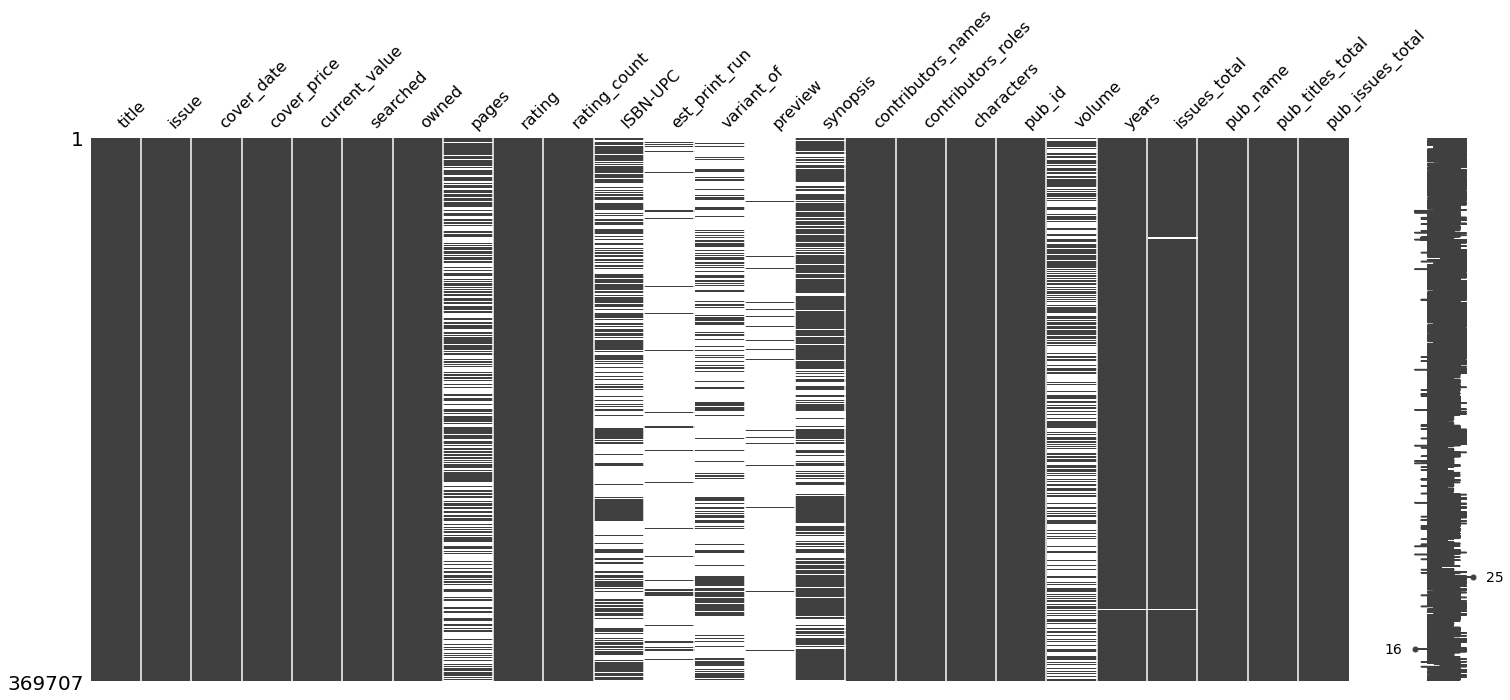

In [64]:
msno.matrix(dados);

Com isso podemos ter uma boa ideia do nosso conjunto de dados. 

1. as colunas de rating possuem valores zerados tanto para as colunas owned, rating, count_rating. E o que torna mais discrepante ainda é que no minimo 75% dos dados nas rating, count_rating são 0.

2. Vamos verificar a distribuição dos valores num histograma

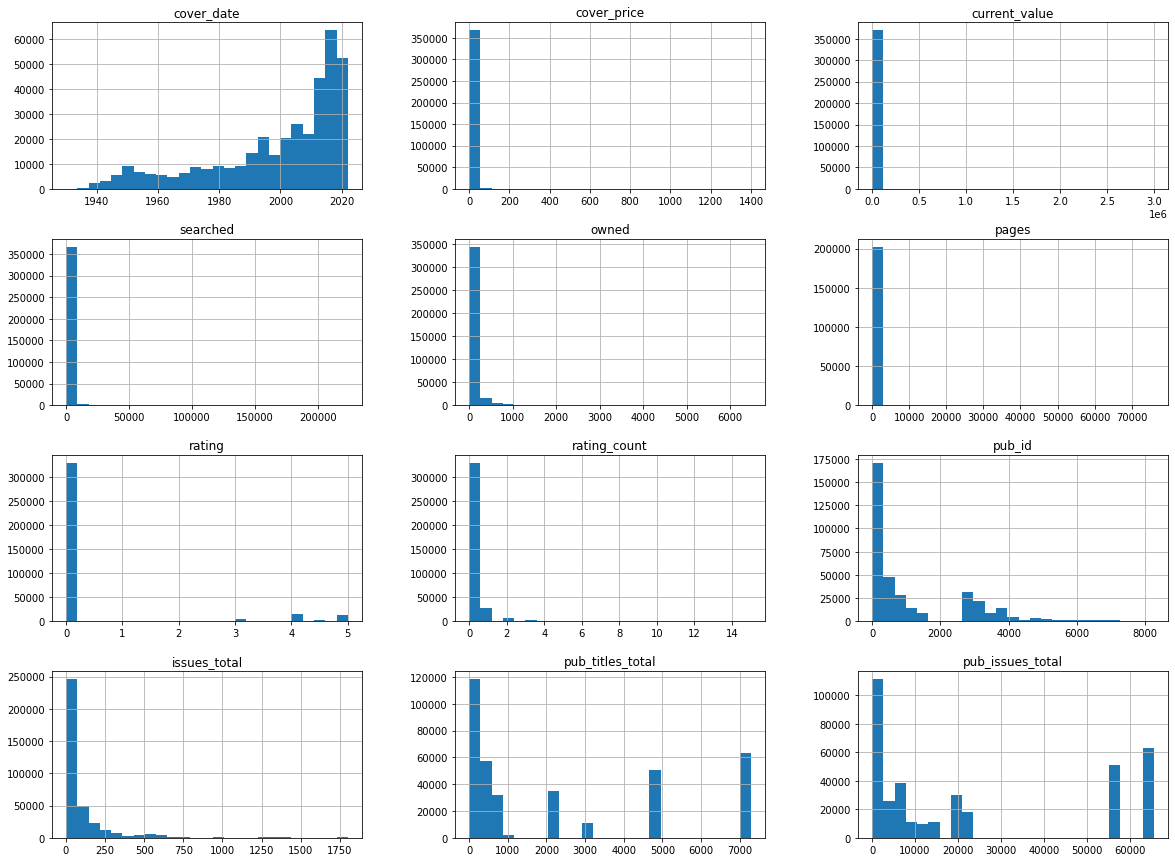

In [65]:
dados.hist(bins=25, figsize=(20,15));

# TITLE

In [66]:
contagem = dados.title.value_counts().to_frame().reset_index().iloc[:10]

In [67]:
contagem.head(3)

,index,title
0,Amazing Spider-Man,2301
1,March of Comics,1765
2,Batman,1727


In [68]:
contagem.columns = ['title', 'Contagem']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

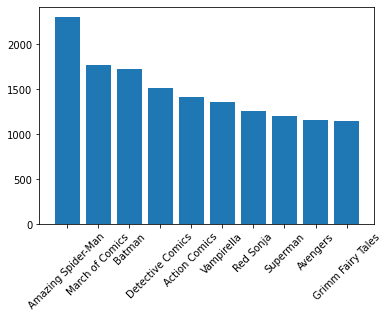

In [69]:
plt.bar(x=contagem['title'], height=contagem['Contagem'])
plt.xticks(rotation = 45)

# ISSUE

In [70]:
contagem_issue = dados.issue.value_counts().to_frame().reset_index().iloc[:10]

In [71]:
contagem_issue.columns = ['issue', 'Contagem']

In [72]:
contagem_issue.issue.unique()

array(['# 1', '# 2', '# 3', '# 4', '# 5', '# 1b', '# 6', '# 7', '# 8',
       '# 9'], dtype=object)

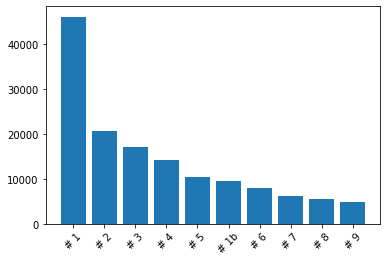

In [73]:
plt.bar(x=contagem_issue['issue'], height=contagem_issue['Contagem'])
plt.xticks(rotation = 45);

# COVER DATE

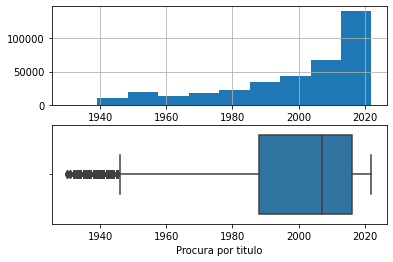

In [74]:
plt.subplot(2,1,1)
dados.cover_date.hist()

plt.subplot(2,1,2)
ax = sns.boxplot(x=dados.cover_date)
ax.set(xlabel="Procura por titulo")


plt.show()

# COVER PRICE

In [75]:
dados.cover_price.quantile(0.95)

16.95

In [223]:
dados.query('cover_price == 0').cover_price.count()

38706

38706 titulos foram distribuidos de graça

# CURRENT VALUE

In [230]:
dados.current_value.quantile(0.95)

225.0

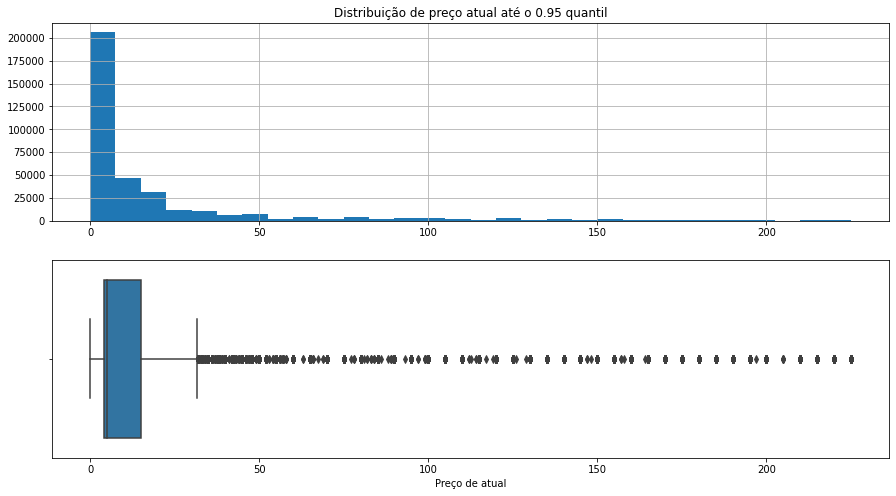

In [ ]:
plt.subplot(2,1,1)
dados.query('current_value <= 225 ').current_value.hist(bins=30)
plt.title('Distribuição de preço atual até o 0.95 quantil')

plt.subplot(2,1,2)
ax = sns.boxplot(x=dados.query('current_value <= 225').current_value)
ax.set(xlabel="Preço de atual")


plt.show()

# PAGES

In [66]:
dados.reset_index(inplace = True)

In [67]:
dados.drop(['index'], axis = 1, inplace = True)

In [68]:
dados.query("pages > 10000 ")

,title,issue,cover_date,cover_price,current_value,searched,owned,pages,rating,rating_count,...,contributors_names,contributors_roles,characters,pub_id,volume,years,issues_total,pub_name,pub_titles_total,pub_issues_total
135293,Warhammer 40000: Marneus Calgar,# 1-2nd print,2021,4.99,5.0,319,0,75960.0,0.0,0,...,no contributors assigned,no contributors assigned,no characters assigned,2.0,NaN,2020 - 2021,14.0,Marvel Comics,7285,65535


In [72]:
dados['pages'].iloc[135293] = 128

In [73]:
dados['pages'].iloc[135293]

128.0

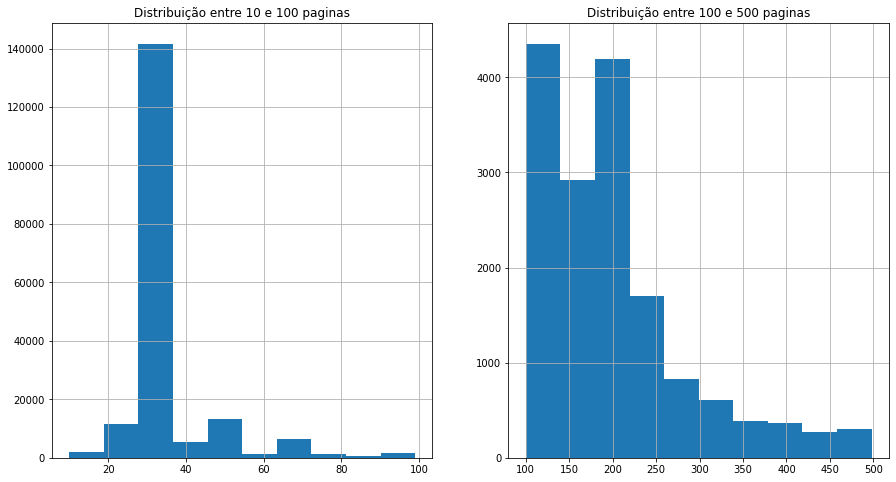

In [184]:
plt.subplot(1,2,1)
dados.query('10 <= pages < 100').pages.hist()
plt.title('Distribuição entre 10 e 100 paginas')

plt.subplot(1,2,2)
dados.query('100 <= pages < 500').pages.hist()
plt.title('Distribuição entre 100 e 500 paginas')
plt.show()

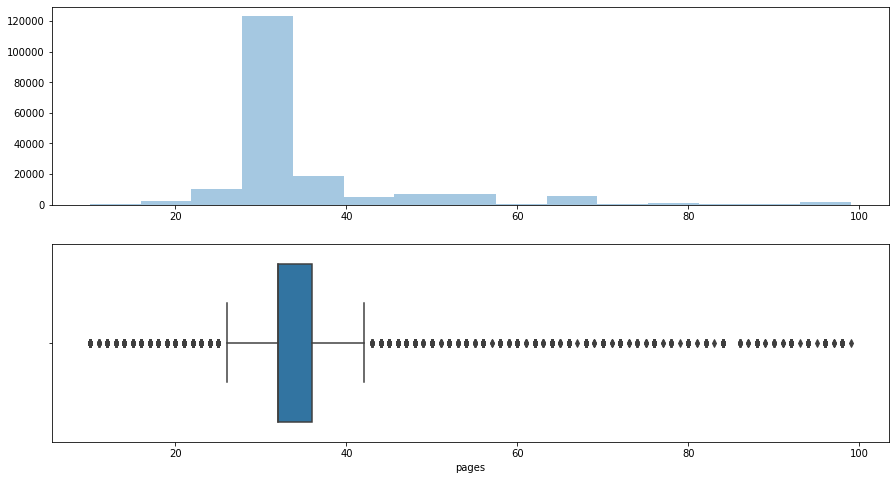

In [186]:
plt.subplot(2,1,1)
ax = sns.distplot(x=dados.query('10 <= pages < 100' ).pages, kde=False, bins = 15, );

plt.subplot(2,1,2)
ax2 = sns.boxplot(x=dados.query('10 <= pages < 100').pages)

plt.show()

In [187]:
dados.query('0 <= pages < 10' ).pages.count()

678

In [188]:
dados.pages.isnull().sum()

167165

## ANALISE DA VARIÁVEL RATING

tamanho da amostra: 369707


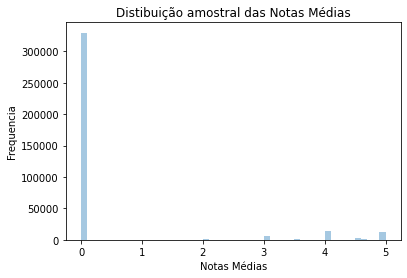

In [15]:
print('tamanho da amostra:', len(dados['rating']))
ax = sns.distplot(x=dados['rating'], kde = False)
ax.set(title = 'Distibuição amostral das Notas Médias', xlabel = 'Notas Médias', ylabel='Frequencia');

Percebemos uma quantidade muita grande de notas médias 0 que as outras notas. 

tamanho da amostra: 40114


[Text(0, 0.5, 'Frequencia'),
 Text(0.5, 0, 'Notas Médias'),
 Text(0.5, 1.0, 'Distribuição da amostra das notas médias maiores que zero')]

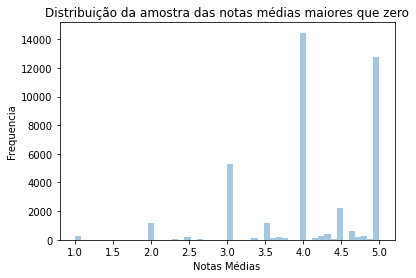

In [16]:
ratings_maior_zero = dados.query('rating > 0')
print('tamanho da amostra:',len(ratings_maior_zero.rating))
ax = sns.distplot(ratings_maior_zero.rating, kde = False)
ax.set(title='Distribuição da amostra das notas médias maiores que zero', ylabel = 'Frequencia', xlabel = 'Notas Médias')

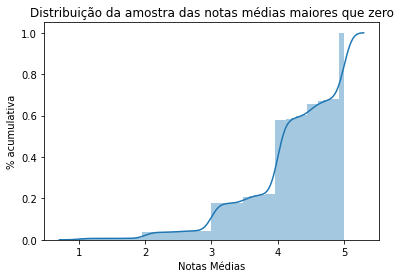

In [17]:
ax = sns.distplot(ratings_maior_zero.rating, hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True});
ax.set(title='Distribuição da amostra das notas médias maiores que zero', ylabel = '% acumulativa', xlabel = 'Notas Médias');

Podemos ter somente um voto para cada comics, vamos verificar quantos desses votos teve somente um votante. 

In [18]:
count_igual_1 = ratings_maior_zero.query('rating_count == 1')
count_maior_5 = ratings_maior_zero.query('rating_count >= 5')
print('receberam somente 1 review:', len(count_igual_1['rating_count']))
print('receberam mais que 4 reviews:', len(count_maior_5['rating_count']))
print('quantidade total dos que receperam pelo menos 1 review:', len(ratings_maior_zero))
print('------------------------------------------------------------------------------------------------------------')
print('quantidade de titulos que recebream mais que 1 review', 42284-29889)
print('quantidade que recebeu menos que 5 reviews:', 42284-1393)

receberam somente 1 review: 28168
receberam mais que 4 reviews: 1361
quantidade total dos que receperam pelo menos 1 review: 40114
------------------------------------------------------------------------------------------------------------
quantidade de titulos que recebream mais que 1 review 12395
quantidade que recebeu menos que 5 reviews: 40891


#SEARCHED

tamanho da amostra: 369707


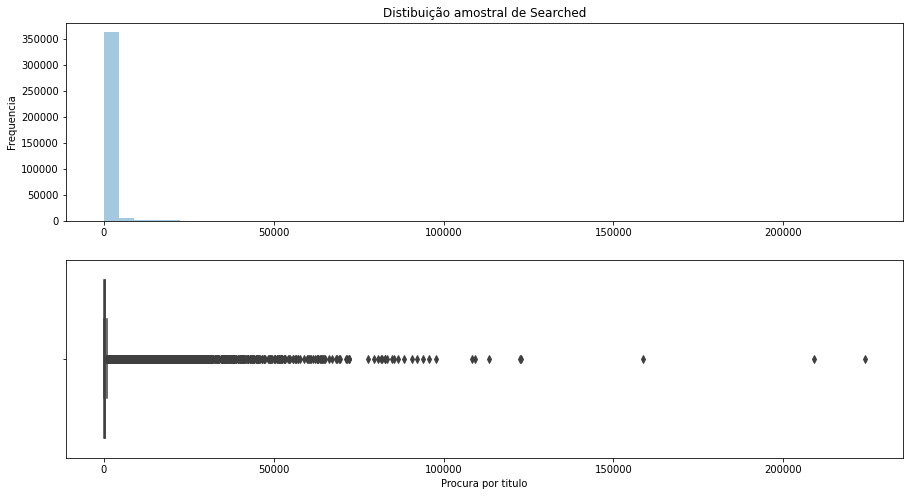

In [192]:
print('tamanho da amostra:', len(dados.searched))
plt.subplot(2,1,1)
ax = sns.distplot(x=dados.searched, kde=False);
ax.set(title = 'Distibuição amostral de Searched',ylabel='Frequencia');

plt.subplot(2,1,2)
ax = sns.boxplot(x=dados.searched)
ax.set(xlabel="Procura por titulo")


plt.show()

A distribuição das vezes que um Comics foi pesquisado, parece possuir muitos valores proximos de zero, vamos verificar:

In [198]:
print('igual à 0:  ', dados.query("searched == 0").searched.count())
print('maior que 1:', dados.query("searched > 1").searched.count())
print('maior que 50:', dados.query("searched > 50").searched.count())
print('maior que 500:', dados.query("searched > 500").searched.count())
print('maior que 5000:', dados.query("searched > 5000").searched.count())
print('maior que 50000:', dados.query("searched > 50000").searched.count())
print('maior que 100000:', dados.query("searched > 100000").searched.count())

igual à 0:   52
maior que 1: 369509
maior que 50: 288316
maior que 500: 79894
maior que 5000: 5686
maior que 50000: 87
maior que 100000: 8


In [199]:
dados.searched.describe()

count    369707.000000
mean        557.364421
std        2030.449350
min           0.000000
25%          57.000000
50%         150.000000
75%         420.000000
max      224080.000000
Name: searched, dtype: float64

In [29]:
dados.searched.quantile(0.9)

1122.0

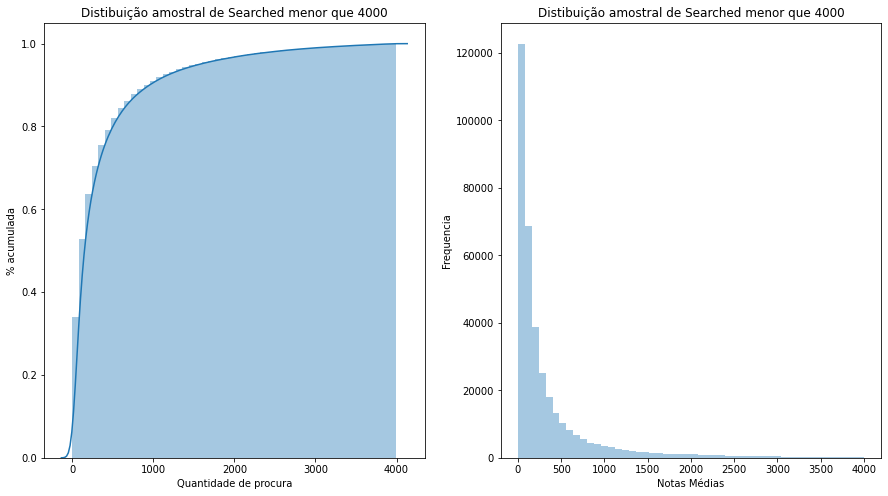

In [194]:
plt.subplot(1,2,1)
ax = sns.distplot(x=dados.query('searched < 4000').searched, hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True});
ax.set(title = 'Distibuição amostral de Searched menor que 4000', xlabel = 'Quantidade de procura', ylabel='% acumulada');

plt.subplot(1,2,2)
ax = sns.distplot(x=dados.query('searched < 4000').searched, kde=False);
ax.set(title = 'Distibuição amostral de Searched menor que 4000', xlabel = 'Notas Médias', ylabel='Frequencia');

plt.show()

Vamos dar uma olhada nos top procurados de nosso conjunto de dados:

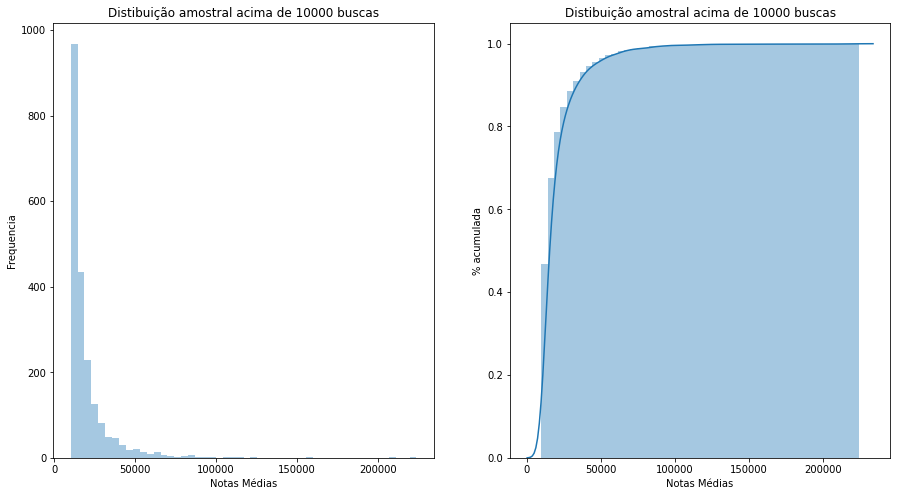

In [197]:
plt.subplot(1,2,1)
ax = sns.distplot(x=dados.query('searched >= 10000').searched, kde=False);
ax.set(title = 'Distibuição amostral acima de 10000 buscas', xlabel = 'Notas Médias', ylabel='Frequencia');

plt.subplot(1,2,2)
ax = sns.distplot(x=dados.query('searched > 10000').searched, hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True});
ax.set(title = 'Distibuição amostral acima de 10000 buscas', xlabel = 'Notas Médias', ylabel='% acumulada');

plt.show()

# OWNED

In [285]:
dados.query('owned == 0').owned.count()

54058

Temos muitos titulos com nimguem reclamando que o pussui

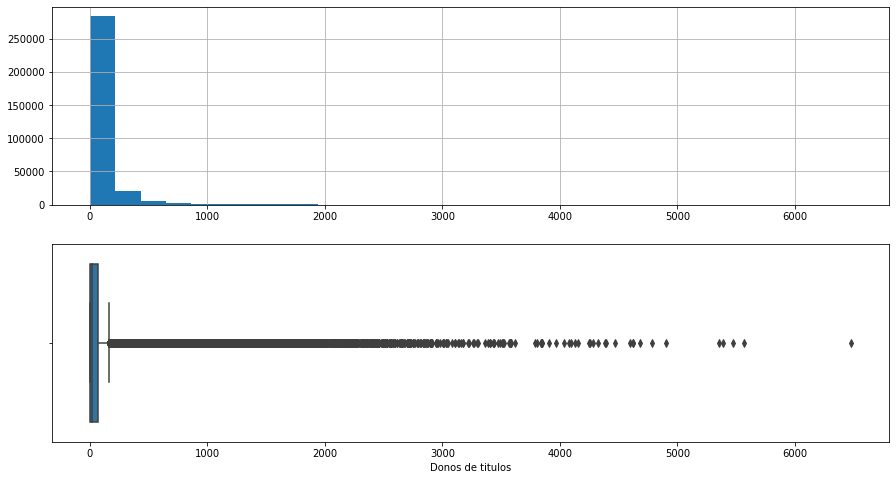

In [288]:
plt.subplot(2,1,1)
dados.query('owned > 0').owned.hist(bins=30)

plt.subplot(2,1,2)
ax = sns.boxplot(x=dados.query('owned > 0').owned)
ax.set(xlabel="Donos de titulos")


plt.show()

In [293]:
dados.sort_values(by = 'owned', ascending=False).query('owned > 0').owned.iloc[:20,]

154584    6478
133301    5564
138637    5478
138996    5393
139273    5358
2682      4903
139364    4789
124081    4681
139283    4627
138495    4626
139265    4600
134802    4467
133304    4395
155177    4381
133343    4324
138725    4281
139291    4258
155165    4252
137067    4154
123734    4132
Name: owned, dtype: int64

# COMPARATIVO  (em progresso e alterações)

In [200]:
comparativo = dados[['title','issue','searched','owned','current_value','pub_name']]
#comparativo['searched_x_owned'] = comparativo[]
comparativo.sort_values(by='owned', ascending=False)[:10]

,title,issue,searched,owned,current_value,pub_name
154584,Spawn,# 1,109188,6478,30.0,Image Comics
133301,Uncanny X-Men,# 281,45325,5564,5.0,Marvel Comics
138637,X-Force,# 2,51642,5478,8.0,Marvel Comics
138996,X-Men,# 1,86519,5393,6.0,Marvel Comics
139273,X-Men,# 1c,62889,5358,10.0,Marvel Comics
2682,Adventures of Superman,# 500c,57030,4903,5.0,DC Comics
139364,X-Men,# 2,28842,4789,5.0,Marvel Comics
124081,Spider-Man 2099,# 1,25994,4681,45.0,Marvel Comics
139283,X-Men,# 1d,52327,4627,6.0,Marvel Comics
138495,X-Force,# 1,68644,4626,6.0,Marvel Comics


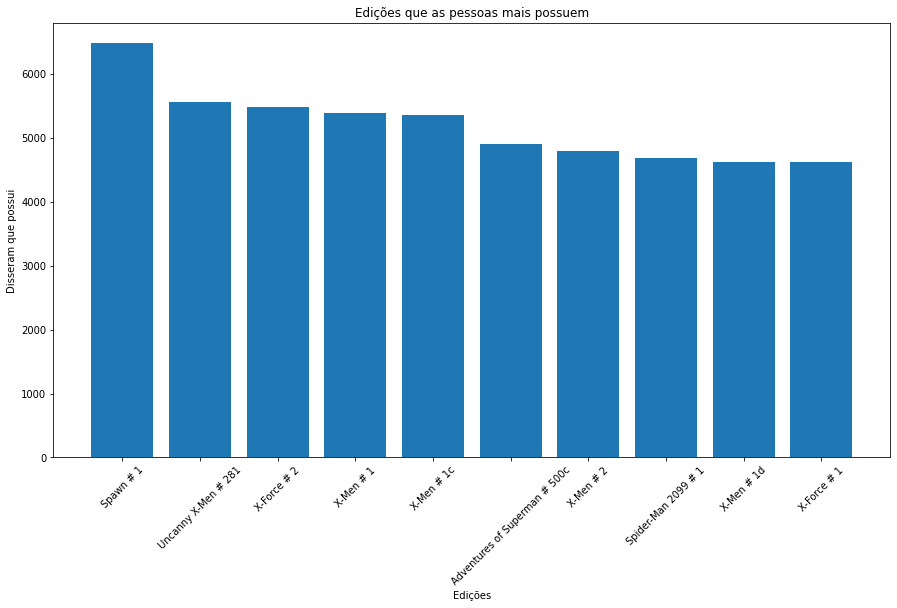

In [35]:
top_10_owned = dados[['title_issue','owned']]

plotar_top_10_owned = top_10_owned.sort_values(by= 'owned', ascending=False).iloc[:10,]

plt.figure(figsize= [15,8])
plt.bar(x = plotar_top_10_owned['title_issue'], height=plotar_top_10_owned.owned)
plt.xticks(rotation = 45)
plt.ylabel('Disseram que possui');
plt.xlabel('Edições');
plt.title('Edições que as pessoas mais possuem');

In [36]:
comparativo.sort_values(by='searched', ascending=False)[:10]

,title,searched,owned,current_value,pub_name
162427,X-Men,224080,1507,125.0,Marvel Comics
155977,Uncanny X-Men,209227,1719,50.0,Marvel Comics
101639,Amazing Spider-Man,158604,3174,225.0,Marvel Comics
156278,Uncanny X-Men,122915,2493,200.0,Marvel Comics
101528,Amazing Spider-Man,122602,2403,800.0,Marvel Comics
100709,Amazing Spider-Man,113520,175,62000.0,Marvel Comics
179375,Spawn,109188,6478,30.0,Image Comics
156217,Uncanny X-Men,108420,2583,75.0,Marvel Comics
156250,Uncanny X-Men,97897,2562,55.0,Marvel Comics
101348,Amazing Spider-Man,95788,2078,250.0,Marvel Comics


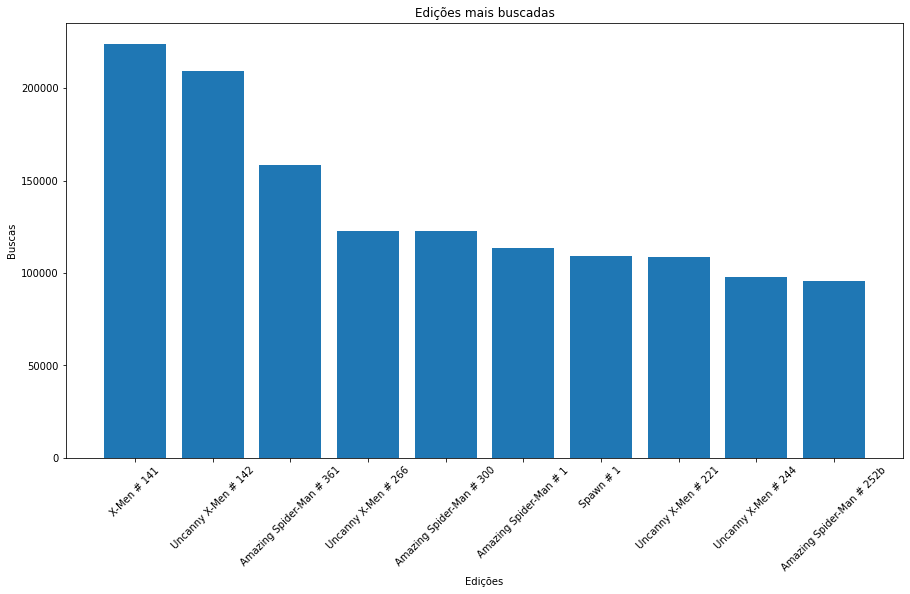

In [37]:
top_10 = dados[['title_issue','searched']]

plotar_top_10 = top_10.sort_values(by= 'searched', ascending=False).iloc[:10,]

plt.figure(figsize= [15,8])
plt.bar(x = plotar_top_10['title_issue'], height=plotar_top_10.searched)
plt.xticks(rotation = 45)
plt.ylabel('Buscas');
plt.xlabel('Edições');
plt.title('Edições mais buscadas');

Comics mais valiosos segundo nossos dados

In [38]:
comparativo.sort_values(by='current_value', ascending=False)[:10]

,title,searched,owned,current_value,pub_name
266,Action Comics,63691,19,3000000.0,DC Comics
43250,Superman,24682,10,1100000.0,DC Comics
17586,Detective Comics,37656,11,1000000.0,DC Comics
3105,All-American Comics,4485,6,700000.0,DC Comics
5432,Batman,61085,20,550000.0,DC Comics
377100,Captain America Comics,5327,6,365000.0,Timely Comics
1273,Action Comics,13280,8,340000.0,DC Comics
100565,Amazing Fantasy,21278,74,340000.0,Marvel Comics
377402,Marvel Comics,5065,3,320000.0,Timely Comics
377403,Marvel Comics,2137,0,300000.0,Timely Comics


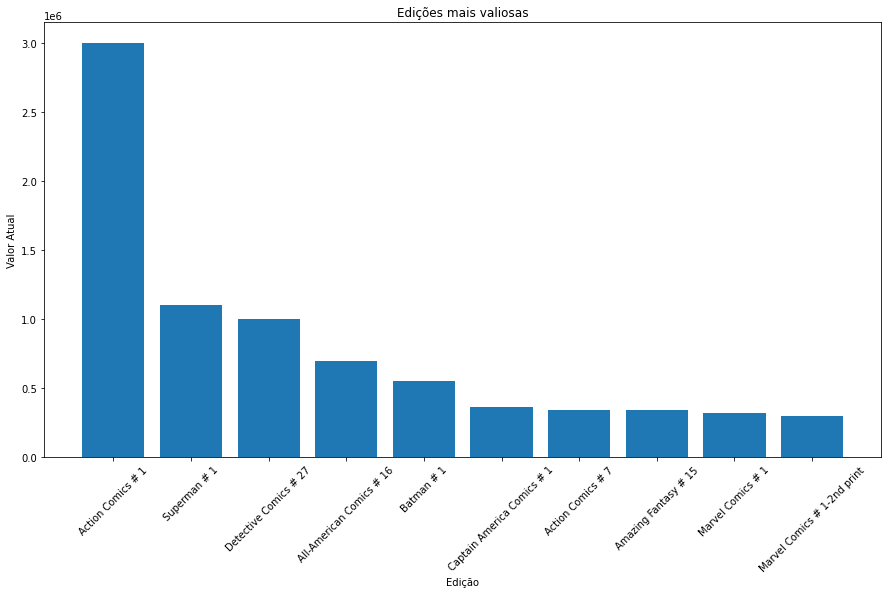

In [39]:
top_10_current_value = dados[['title_issue','current_value']]

plotar_top_10_current_value = top_10_current_value.sort_values(by= 'current_value', ascending=False).iloc[:10,]

plt.figure(figsize= [15,8])
plt.bar(x = plotar_top_10_current_value['title_issue'], height=plotar_top_10_current_value.current_value)
plt.xticks(rotation = 45)
plt.ylabel('Valor Atual');
plt.xlabel('Edição');
plt.title('Edições mais valiosas');

In [40]:
dados[['title', 'searched','owned', 'rating','rating_count','cover_date', 'current_value','pub_name']].sort_values(by='current_value', ascending = False).iloc[:10]

,title,searched,owned,rating,rating_count,cover_date,current_value,pub_name
266,Action Comics,63691,19,4.5,2,84,3000000.0,DC Comics
43250,Superman,24682,10,0.0,0,83,1100000.0,DC Comics
17586,Detective Comics,37656,11,5.0,2,83,1000000.0,DC Comics
3105,All-American Comics,4485,6,0.0,0,82,700000.0,DC Comics
5432,Batman,61085,20,4.0,1,82,550000.0,DC Comics
377100,Captain America Comics,5327,6,0.0,0,81,365000.0,Timely Comics
1273,Action Comics,13280,8,0.0,0,84,340000.0,DC Comics
100565,Amazing Fantasy,21278,74,5.0,4,60,340000.0,Marvel Comics
377402,Marvel Comics,5065,3,0.0,0,83,320000.0,Timely Comics
377403,Marvel Comics,2137,0,0.0,0,83,300000.0,Timely Comics


In [41]:
dados_finalizar = dados[['cover_date', 'current_value', 'searched', 'owned', 'issues_total','pub_issues_total']]

In [42]:
#top_10_current_value = dados[['title_issue','current_value']]

#plotar_top_10_current_value = top_10_current_value.sort_values(by= 'current_value', ascending=False).iloc[:10,]

#plt.figure(figsize= [15,8])
#plt.bar(x = plotar_top_10_current_value['title_issue'], height=plotar_top_10_current_value.current_value)
#plt.xticks(rotation = 45)
#plt.ylabel('Valor Atual');
#plt.xlabel('Titulo_Ed');
#plt.title('Edições mais valiosas');

In [43]:
agrupado_title = dados.groupby('title')['searched', 'owned'].sum()

In [44]:
agrupado_title.reset_index(inplace=True)
agrupado_title_searched = agrupado_title.sort_values(by='searched', ascending=False).iloc[:10]

In [45]:
agrupado_title_searched

,title,searched,owned
1886,Amazing Spider-Man,14182111,805549
4373,Batman,7125555,540190
44645,Uncanny X-Men,5770046,676028
47674,X-Men,4347076,343221
3594,Avengers,3316312,347826
15123,Fantastic Four,2925224,318600
12355,Detective Comics,2818292,315485
42417,The Walking Dead,2671420,119497
11166,Daredevil,2487786,292690
37071,Spawn,2470223,199939


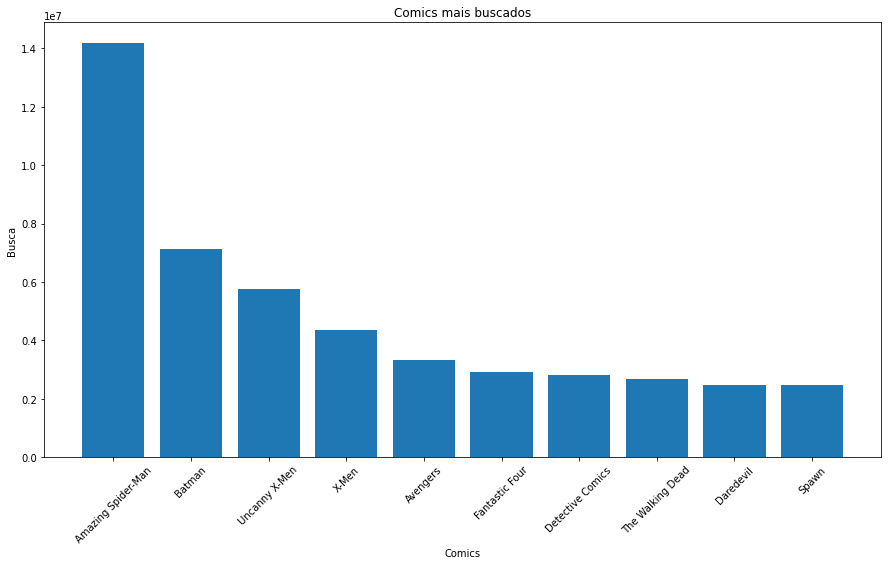

In [46]:
plt.figure(figsize= [15,8])
plt.bar(x = agrupado_title_searched['title'], height=agrupado_title_searched.searched)
plt.xticks(rotation = 45)
plt.ylabel('Busca');
plt.xlabel('Comics');
plt.title('Comics mais buscados');

In [47]:
agrupado_pub_name = dados.groupby('pub_name')['searched', 'owned'].sum()
agrupado_pub_name.reset_index(inplace=True)
agrupado_pub_name_searched = agrupado_pub_name.sort_values(by='searched', ascending=False).iloc[:10]

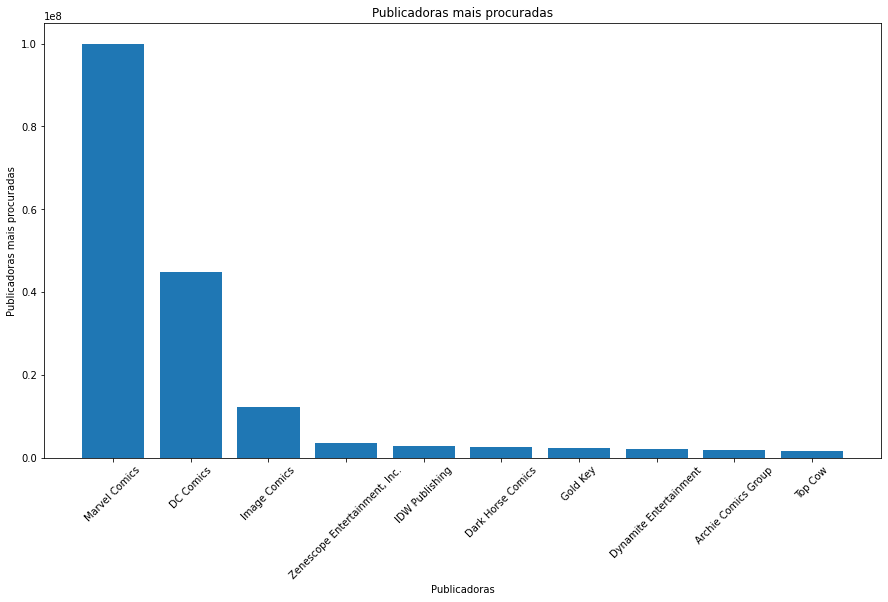

In [48]:
plt.figure(figsize= [15,8])
plt.bar(x = agrupado_pub_name_searched['pub_name'], height=agrupado_pub_name_searched.searched)
plt.xticks(rotation = 45)
plt.ylabel('Publicadoras mais procuradas');
plt.xlabel('Publicadoras');
plt.title('Publicadoras mais procuradas');

In [49]:
dados = dados[dados['issues_total'].notna()]

In [50]:
pd.isna(dados_finalizar).sum()

cover_date             0
current_value          0
searched               0
owned                  0
issues_total        3108
pub_issues_total       0
dtype: int64

In [51]:
corr_matrix = dados_finalizar.corr()
corr_matrix['current_value'].sort_values(ascending=False)

current_value       1.000000
searched            0.084161
cover_date          0.044758
issues_total        0.024052
pub_issues_total    0.005789
owned              -0.006010
Name: current_value, dtype: float64